In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import binary_crossentropy

In [99]:
X = pd.read_csv('X.csv')
X = X.drop(columns = [X.columns[0]])
X = np.array(X)
rows = X.shape[0]
X = np.reshape(X, (rows, 50, 50, 1))
print(X.shape)

(3227, 50, 50, 1)


In [100]:
y = pd.read_csv('y.csv')
y = y.drop(columns = [y.columns[0]])
y = np.array(y)
y = np.reshape(y, (rows, 1))
print(y.shape)

(3227, 1)


In [101]:
X, y = shuffle(X, y, random_state = 0)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

In [103]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 2)

In [104]:
print(X_train.shape, X_val.shape, X_test.shape)

(2330, 50, 50, 1) (412, 50, 50, 1) (485, 50, 50, 1)


[0]


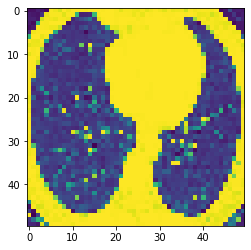

In [105]:
arr = X_train[1]
arr = np.reshape(arr, (50, 50, 1))
plt.imshow(arr)
print(y_train[1])

In [106]:
mean = np.mean(X_train)
deviation = np.std(X_train)
X_train = (X_train - mean) / deviation

In [107]:
X_val = (X_val - mean) / deviation

In [113]:
model = keras.models.Sequential()

model.add(Conv2D(64, (3, 3), 1, 'same', activation = 'relu', input_shape = (50, 50, 1)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), 1, 'same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), 1, 'same', activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.30))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 50, 50, 64)        640       
_________________________________________________________________
dropout_21 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
dropout_22 (Dropout)         (None, 25, 25, 128)       0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 256)     

In [116]:
model.compile(optimizer = Adam(lr = 1e-3), loss = binary_crossentropy, metrics = ['accuracy'])
hist = model.fit(X_train, y_train, epochs = 5, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/5
73/73 [==============================] - 20s 266ms/step - loss: 0.0557 - accuracy: 0.9814 - val_loss: 0.3631 - val_accuracy: 0.8883
Epoch 2/5
73/73 [==============================] - 18s 241ms/step - loss: 0.0376 - accuracy: 0.9855 - val_loss: 0.3341 - val_accuracy: 0.8859
Epoch 3/5
73/73 [==============================] - 18s 241ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.4036 - val_accuracy: 0.8786
Epoch 4/5
73/73 [==============================] - 18s 244ms/step - loss: 0.0443 - accuracy: 0.9818 - val_loss: 0.4042 - val_accuracy: 0.8835
Epoch 5/5
73/73 [==============================] - 18s 243ms/step - loss: 0.0327 - accuracy: 0.9866 - val_loss: 0.3068 - val_accuracy: 0.9029


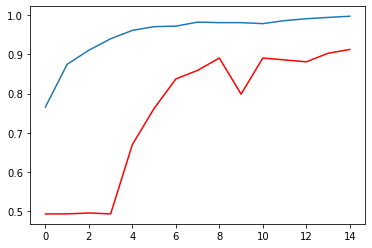

In [58]:
plt.plot(hist.history['accuracy'], label = 'Training accuracy')
plt.plot(hist.history['val_accuracy'], color = 'r', label = 'Validation accuracy')

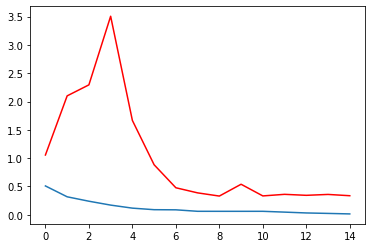

In [59]:
plt.plot(hist.history['loss'], label = 'Training loss')
plt.plot(hist.history['val_loss'], color = 'r', label = 'Validation loss')

In [117]:
X_test = (X_test - mean) / deviation

In [118]:
model.evaluate(X_test, y_test, verbose = 1)

16/16 [==============================] - 1s 44ms/step - loss: 0.3395 - accuracy: 0.8907


[0.3395169675350189, 0.8907216787338257]

In [39]:
predicted = model.predict(x = X_test, verbose = 1)

16/16 [==============================] - 0s 17ms/step
